# NAILDOH: Social Class Part 2

## Resources

The is the sixth notebook in the series used to prepare and analyze the NAILDOH collection.

In [93]:
# Libraries
library(tidyverse) # for data manipulation

In [94]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

In [95]:
# Data
letters <- factorize(read.csv("20240317_PhD_NaildohSubsetB.csv")) # Put csv into a dataframe called docData
colnames(letters) # Get an overview of the dataframe
dim(letters)

[1] "docid"                     "sourcetitle"              
 [3] "docyear"                   "docmonth"                 
 [5] "docday"                    "authorLocation"           
 [7] "nationalOrigin"            "docauthorid"              
 [9] "docauthorname"             "authorgender"             
[11] "agewriting"                "birthyear"                
[13] "deathyear"                 "religion"                 
[15] "cultural_heritage"         "north_american_occupation"
[17] "native_occupation"         "marriagestatus"           
[19] "maternalstatus"            "religionNew"              
[21] "relMin"                    "occupation"               
[23] "publicLetter"

[1] 576  23

### Cleaning & Refining Subset

Letter S1019-D023 was a continuation of the entry in S1019-D022 so these were combined and S1019-D023 deleted from the dataframe and the folder containing the text files. Letters were also inspected and combined as shown.

S9908-D030 - S9908-D038 by William Samson are published in a book with unidentified recipients and contain opinions about and accounts of places, politics and experiences in Europe. These will be omitted because they are more like memoir rather than contemporaneous accounts of lived experience. Of the undated Samson letters, only S9908-D039 is kept because it describes his arrival in a relatively conteporaneous way and is addressed to an individual. 

In [96]:
vals <- c("S1019-D023",
          "S1019-D044",
          "S1019-D045",
          "S1019-D051",
          "S9908-D030",
          "S9908-D031",
          "S9908-D032",
          "S9908-D033",
          "S9908-D034",
          "S9908-D035",
          "S9908-D036",
          "S9908-D037",
          "S9908-D038"
           )
letters <- letters[!letters$docid %in% vals, ]


The William Bell so-called letters are all removed because they were written more as a journal-memoir than as a letter -- publishing intended, unknown readers, undated, retrospective rather than contemporaneous. 

In [97]:
letters <- letters[!letters$docauthorname=="Bell, William, 1780-1857",]

Removing strictly professional letters by Susannah Moodie. Others to her editor were left because she was on quite familiar terms with him and related all kinds of personal information in her letters, which also discussed work related matters.

In [98]:
vals <- c("S2344-D038",
          "S2344-D039",
          "S2344-D041",
          "S2344-D042",
          "S2344-D044",
          "S2344-D045",
          "S2344-D046",
          "S2344-D048",
          "S2344-D049",
          "S2344-D079",
          "S2344-D123", #An obituary submitted to an editor
          "S2344-D125"
         )
letters <- letters[!letters$docid %in% vals, ]

In [99]:
vals <- c("S9845-D003", # Letter to an editor describing contents of something else.
          "S9865-D073", # Government call for settlers
          "S9974-D029", # Letter to the editor 
          "S6210-D047", # One line only 
          "S9865-D010", # Business letter responding to migration enquiry
          "S9865-D072", # This appears to be a survey report rather than a personal letter
          "S9865-D078" # Not a personal letter.
          )
letters <- letters[!letters$docid %in% vals, ]

In [100]:
# Checking to make sure csv matches folder list.

# make list of doc ids in csv
csv <- sort(letters$docid)

# make list of doc ids in folder
WD <- getwd()
setwd(WD)
files <- list.files("letters")
folder <- sort(sub('.txt', '', files))

setdiff(csv, folder)
setdiff(folder, csv)

[1] "S2344-D095" "S6210-D043" "S6210-D048" "S6210-D057" "S6210-D059"
 [6] "S6210-D062" "S6210-D064" "S6210-D077" "S6210-D088" "S6210-D089"
[11] "S6210-D090" "S6210-D100" "S6210-D101" "S6210-D152" "S6210-D166"
[16] "S6210-D177" "S6210-D182" "S6210-D185" "S6210-D186" "S6210-D195"
[21] "S6210-D202" "S6210-D213" "S6210-D220" "S6210-D221" "S6210-D232"
[26] "S6210-D234"

[1] "cleaned"

In [101]:
letters %>% 
filter(is.na(docmonth)) %>% 
select(docauthorname, docid, docyear, docmonth, docday, authorLocation) 

docauthorname,docid,docyear,docmonth,docday,authorLocation
<fct>,<fct>,<int>,<int>,<int>,<fct>
"Segale, Sister Blandina, 1850-1941",S1019-D041,1884,NA,NA,USA
"Segale, Sister Blandina, 1850-1941",S1019-D050,1886,NA,NA,USA
"Segale, Sister Blandina, 1850-1941",S1019-D053,1886,NA,NA,USA
"Segale, Sister Blandina, 1850-1941",S1019-D057,1891,NA,NA,USA
"Moodie, Susannah Strickland, 1803-1885",S2344-D040,1836,NA,NA,Canada
"Moodie, Susannah Strickland, 1803-1885",S2344-D051,1853,NA,NA,Canada
"Moodie, Susannah Strickland, 1803-1885",S2344-D063,1855,NA,NA,Canada
"Moodie, Susannah Strickland, 1803-1885",S2344-D070,1857,NA,NA,Canada
"Moodie, Susannah Strickland, 1803-1885",S2344-D095,1860,NA,NA,Canada


The Humphrey letter was incorrectly shown as not being dated. The date, contained in the footnote, has been added to the metadata. 

S9974-D008 is not undated -- the letter is just preceeded by a lot of editorial introduction. This is  corrected and in the text file.

In [102]:
letters$docmonth[letters$docid=="S9974-D008"] <- 7
letters$docday[letters$docid=="S9974-D008"] <- 6

letters$docmonth[letters$docid=="S9635-D006"] <- 9
letters$docday[letters$docid=="S9635-D006"] <- 24

I've checked all the other letters missing year or month and they are ok to keep in the corpus.

### Preparing occupation data

In [103]:
# Make a new variable called social class
# Fill with the values from the occupation (combined) variable
letters$socialClass <- letters$occupation

In [104]:
# Get a list of unique job titles (note: some cells contain multiple titles)
letters$socialClass %>%
str_split("; ") %>% 
unlist() %>% 
unique() 

[1] "Nun"                  "Social worker"        "Teacher"             
 [4] "Military wife"        "Writer"               NA                    
 [7] "Clergy"               "Farmer"               "Farmer's wife"       
[10] "Miner"                "Homemaker"            "Merchant"            
[13] "Laborer"              "Businessman"          "Artist"              
[16] "Educator"             "Printer"              "Architect"           
[19] "Government appointee" "Politician"           "Religious leader"    
[22] "Tradesman"            "Rancher"              "Government employee" 
[25] "Surveyor"             "Manufacturer"         "Urban planner"       
[28] "Missionary"

In [105]:
# To what value does the "wife" problem apply
unique(letters$socialClass[which(grepl("wife", letters$socialClass))])

[1] Military wife; Writer Farmer's wife        
30 Levels: Architect Artist; Educator Businessman ... Writer; Printer

In [106]:
# Fix this to assign the husband's profession to the wife
letters$socialClass  <-  str_remove_all(letters$socialClass, "[:space:]wife")
letters$socialClass  <-  str_remove_all(letters$socialClass, "\'s")

In [107]:
# Check to make sure that north_american_occupation and socialClass contain the same values
setdiff(letters$occupation, letters$socialClass) # items in occupation and not socialClass
setdiff(letters$socialClass, letters$occupation) # items in socialClass and not occupation

[1] "Military wife; Writer" "Farmer's wife"

[1] "Military; Writer"

Farmer's wife resolves to Farmer, which appears in both lists, which is why it does not appear in line 2. 

In [108]:
# Put the list of unique job titles into a list (note: some cells contain multiple titles)
Jobs  <- letters$socialClass %>%
str_split("; ") %>% 
unlist() %>% 
unique() 

print(sort(Jobs))

 [1] "Architect"            "Artist"               "Businessman"         
 [4] "Clergy"               "Educator"             "Farmer"              
 [7] "Government appointee" "Government employee"  "Homemaker"           
[10] "Laborer"              "Manufacturer"         "Merchant"            
[13] "Military"             "Miner"                "Missionary"          
[16] "Nun"                  "Politician"           "Printer"             
[19] "Rancher"              "Religious leader"     "Social worker"       
[22] "Surveyor"             "Teacher"              "Tradesman"           
[25] "Urban planner"        "Writer"              


In [109]:
# Do I want to combine government jobs
# Let's see how they breakdown
vals <- c("Government appointee", "Government employee", "Royal governor")

letters %>% 
filter(grepl(paste(vals, collapse='|'), socialClass)) %>% 
select(docauthorname, socialClass) %>% 
unique()

,docauthorname,socialClass
,<fct>,<chr>
1,"Hudson, Henry James, 1822-",Government appointee; Politician; Religious leader
2,"Robb, Alexander, 1839-",Miner; Laborer; Rancher; Government employee
14,"Buchanan, J. C., fl. 1833",Government employee
15,"Anonymous Government Agent in Upper Canada, fl. 1833",Government employee


In [110]:
# Do I want to combine education / teacher jobs?
# Let's see how they breakdown
# https://en.wikipedia.org/wiki/Robert_Hamilton_Bishop
# http://www.biographi.ca/en/bio/harris_robert_14E.html
# https://en.wikipedia.org/wiki/Sister_Blandina
# http://www.biographi.ca/en/bio/menzies_george_7E.html

vals <- c("Educator", "Teacher")

letters %>% 
filter(grepl(paste(vals, collapse='|'), socialClass)) %>% 
select(docauthorname, socialClass) %>% 
unique()

,docauthorname,socialClass
,<fct>,<chr>
1,"Segale, Sister Blandina, 1850-1941",Nun; Social worker; Teacher
52,"Harris, Robert, 1849-1919",Artist; Educator
62,"Bishop, Robert Hamilton, 1777-1855",Clergy; Educator; Writer
63,"Menzies, George, fl. 1834",Teacher


Bishop was a university professor. Segale appears to have taught in local schools. Harris taught art classes and was a founding member of the Canadian Academy of Arts. Menzies may have been a teacher in Scotland before emigrating. It seems that educator refers to higher stature positions whereas teacher refers to lower stature (though not necessarily less influential) positions. I will keep these for now.

In [111]:
# Do I want to combine Military / Military personnel jobs?
# Let's see how they breakdown
letters %>% 
filter(grepl("Military", socialClass)) %>% 
select(docauthorname, socialClass) %>% 
unique()

,docauthorname,socialClass
,<fct>,<chr>
1,"Moodie, Susannah Strickland, 1803-1885",Military; Writer


Moodie's inherits the Military occupation from her husband, who was an officer. Her occupation will be changed to "Military officer"

In [112]:
letters$socialClass[letters$docauthorname=="Moodie, Susannah Strickland, 1803-1885"] <- "Military officer; Writer"

In [113]:
# Who are the laborers?
letters %>% 
filter(grepl("Laborer", socialClass)) %>% 
select(docauthorname, socialClass) %>% 
unique()

,docauthorname,socialClass
,<fct>,<chr>
1,"Harris, Critchlow, 1813-1899",Farmer; Merchant; Laborer
4,"Harris, Sarah Stretch, 1818-1897",Farmer; Merchant; Laborer
199,"Robb, Alexander, 1839-",Miner; Laborer; Rancher; Government employee
211,"Singer, William, fl. 1831",Laborer; Tradesman


Critchlow and Sarah Stretch Harris

"During October of 1860, after finally having given up on farming, Critchlow attempted to open a store. After a hard, slow go at it, he gave that up as well, almost exactly one year later in October of 1861 (search "store"). After this, he swallowed his pride and forewent his traditional attachment to land and proprietorship and accepted work on a wage. Critchlow began working first for their family friend, Mr. Haszard, and then for the Davies brothers. His tasks included measuring, transporting, and purchasing goods, preparing swine, and overseeing a fishing station, among other various tasks (search "Haszard" and "Davies"). Finally, the financial prospects of the Harris family improved." (http://sarah.emilieroberts.ca/index.php?page=The_Family)


On searching these terms in the source text, it seems evident that Critchlow was working for wages in the agricultural-commercial sector, especially in terms of food distribution (e.g., oats, pork, fish), but he does not seem to be working as an unskilled labourer, given that he did things like measuring and managing, as well as purchasing. I am going to change him from laborer to manager (fishing) and clerk, which will place him and his family in the skilled worker / lower middle class, which seems to be where they are best suited. (https://archive.org/embed/islandfamilyharr0000unse)

In [114]:
letters$socialClass[letters$docauthorname == "Harris, Critchlow, 1813-1899"]  <- "Farmer; Merchant; Manager fishing; Clerk"
letters$socialClass[letters$docauthorname == "Harris, Sarah Stretch, 1818-1897"]  <- "Farmer; Merchant; Manager fishing; Clerk"

Alexander Robb

"...Alex got work among the labourers building the Cariboo wagon road.  After several years struggling to make a living, he and an Englishman were the first two Europeans to homestead in the Nicola Valley of central British Columbia..." (https://ulsterhistoricalfoundation.com/shop/products/alexander-robb)

Alexander served as a labourer in the transportation sector. The information for his biography gives 1910 as his deathyear. Recoding that value accordingly...

In [115]:
letters$deathyear[letters$docauthorname=="Robb, Alexander, 1839-"] <- 1910

In [116]:
letters %>% 
filter(docauthorname=="Singer, William, fl. 1831") %>% 
select(birthyear, deathyear, nationalOrigin, socialClass, occupation, religionNew, docid, sourcetitle) %>% 
unique()

,birthyear,deathyear,nationalOrigin,socialClass,occupation,religionNew,docid,sourcetitle
,<int>,<dbl>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>
1,NA,NA,English,Laborer; Tradesman,Laborer; Tradesman,NA,S9873-D021,Hints on Emigration to Upper Canada; Especially Addressed to the Middle and Lower Classes in Great Britain and Ireland


William Singer

"I then went to work for Mr. Silcog four months, and Jerry Annett worked on the next farm. I have worked some at my trade; a person that can work well, can get a dollar and a half per day, and in the harvest
field we can get a dollar per day."

"I design working at my trade. I have been working on a farm, chopping, and other work...I cut my hand in the summer whilst mowin...on Mr. Silcog's field...there is plenty of hard work here, we can always have plenty to do; we board and lodge with the persons we work for. I am chopping now for Mr&dot; Allworth, on his farm joining Mr. Silcog's. If any of my old acquaintances have got tired of being slaves and drudges, tell them to come to Upper Canada, to William Singer, bricklayer, he'll take them by the hand and lead them to hard work, good wages, and the best of living." (https://archive.org/embed/hintsonemigratio00doyl)


William served as a wage labourer in the agricultural sector. 


For the Erickson variable, I think I should recode Singer into A, Robb into I and Harris into CCP. Singer is clearly working on a farm. Rob is involved in building transportation infrastructure, which is more of an industrial undertaking. And Harris is working to move product, thus he is more in the commercial sector, including in some cases in roles that involve professional skills (e.g., purchasing, overseeing), but his role managing a fishing station also puts him in the farming realm.

In [117]:
letters$socialClass[letters$docauthorname == "Singer, William, fl. 1831"]  <- "Laborer farm; Tradesman"
letters$socialClass[letters$docauthorname == "Robb, Alexander, 1839-"]  <- "Miner; Laborer industry; Rancher; Government employee"

In [118]:
# Who are the homemakers?
letters %>% 
filter(grepl("Homemaker", socialClass)) %>% 
select(docauthorname, socialClass, nationalOrigin, religionNew, relMin, birthyear, deathyear, authorLocation) %>% 
unique()

,docauthorname,socialClass,nationalOrigin,religionNew,relMin,birthyear,deathyear,authorLocation
,<fct>,<chr>,<fct>,<fct>,<lgl>,<int>,<dbl>,<fct>
1,"Roberts, Sarah, fl. 1858",Homemaker,Welsh,Christian,NA,NA,NA,USA


The letters of Sarah Roberts indicate that she and her husband (Humphrey) are involved in farming, but possibly some form of industrial wage labour (e.g., coal mining, steelworks). 

"...We had 210 bushels of wheat and 160 of corn...Wages have risen in every business except farming.
There is no hope that the corn and livestock will go up..." (S316-D189)

"...Puddlers or boilers get eight dollars a ton. The charge is 480 pounds pig-iron and five charges are worked a day. There is an assistant and he gets one third. When working six, there are two assistants, one of which is paid by the day. The colliers get five cents a bushel of eighty pounds and they can raise one hundred bushels a day in a seam five feet thick. They cut and fill and the company takes it away. Laborers get from a dollar and a half to two dollars a day..." (S316-D193)

Further reading of the letters by Sarah indicate that she and her husband are most likely independent farmers, therefore recoding her as such.

In [119]:
letters$socialClass[letters$docauthorname == "Roberts, Sarah, fl. 1858"]  <- "Farmer"

In [120]:
# Who are the teachers?
letters %>% 
filter(grepl("Teacher", socialClass)) %>% 
select(docauthorname, socialClass) %>% 
unique()

,docauthorname,socialClass
,<fct>,<chr>
1,"Segale, Sister Blandina, 1850-1941",Nun; Social worker; Teacher
52,"Menzies, George, fl. 1834",Teacher


In [121]:
# Menzies was also a writer (poet) and co-founder of newspapers, 
# but apparently in an editor / manager role rather than proprietary.
# http://www.biographi.ca/en/bio.php?BioId=37680
# He was a writer in Scotland, not in North America
letters$socialClass[letters$docauthorname == "Menzies, George, fl. 1834"]  <- "Writer; Editor; Printer"

In [122]:
# Menzie's religion is given as Presbyterian in the bio. 
letters$religionNew[letters$docauthorname == "Menzies, George, fl. 1834"]  <- "Presbyterian"
letters$relMin[letters$docauthorname == "Menzies, George, fl. 1834"] <- FALSE

In [123]:
# Who are the printers
letters %>% 
filter(grepl("Printer", socialClass)) %>% 
select(docauthorid, docauthorname, socialClass) %>% 
unique()

,docauthorid,docauthorname,socialClass
,<fct>,<fct>,<chr>
1,per0038055,"Harris, Margaret Ellin, 1851-1944",Writer; Printer
7,per0029174,"Menzies, George, fl. 1834",Writer; Editor; Printer


Margaret is married to William Lawson Cotton, who was a newspaper writer, printer, editor and owner (businessman) of a newspaper. Coding accordingly.



In [124]:
letters$socialClass[letters$docauthorid=="per0038055"] <- "Writer; Printer; Businessman; Editor; Manager media"

In [125]:
# Who are the Government?
letters %>% 
filter(grepl("Government", socialClass)| grepl("governor", socialClass)) %>% 
select(docauthorname, socialClass) %>% 
unique()

,docauthorname,socialClass
,<fct>,<chr>
1,"Hudson, Henry James, 1822-",Government appointee; Politician; Religious leader
2,"Robb, Alexander, 1839-",Miner; Laborer industry; Rancher; Government employee
14,"Buchanan, J. C., fl. 1833",Government employee
15,"Anonymous Government Agent in Upper Canada, fl. 1833",Government employee


Although employee and appointee potentially represent different social stature, for now they will not be differentiated because in the Erickson scheme, they all are the same. For the meantime, I make the following changes based on biographical information found online.

In [126]:
# Alexander Buchanan: "merchant and emigration agent"
# http://biographi.ca/en/bio/buchanan_alexander_carlisle_1786_1840_7E.html
letters$socialClass[letters$docauthorname == "Buchanan, Alexander Carlisle, 1786-1840"]  <- 
"Government appointee; Merchant"

# For future reference:
# http://www.biographi.ca/en/bio/whitworth_aylmer_matthew_7E.html
# Henry James: " public offices, among them postmaster, justice of the peace, county commissioner, and county judge."
# https://history.nebraska.gov/collection_section/henry-james-hudson-1822-1903-rg3031-am/

In [127]:
# Who are the miners?
letters %>% 
filter(grepl("Miner", socialClass)) %>% 
select(docauthorname, socialClass) %>% 
unique()

,docauthorname,socialClass
,<fct>,<chr>
1,"Williams, John R., fl. 1895",Miner
2,"Robb, Alexander, 1839-",Miner; Laborer industry; Rancher; Government employee
14,"Hutchings, James Mason, 1820-1902",Tradesman; Miner; Writer; Businessman


Because mining in North American during the time in question was in its infancy, some of the people described as miners were participating in the Gold Rush as independent prospectors. Therefore, they aren't exactly wage labourers because they don't have "bosses." J.M. Hutchings (https://en.wikipedia.org/wiki/James_Mason_Hutchings) is in this category, whereas J.R. Williams and Alexander Robb were working on wages. That said, none of the occupational classification systems that I have seen make a distinction between miners and prospectors, so I am leaving them together for now.

In [128]:
# Who are the manufacturers?
letters %>% 
filter(grepl("Manufacturer", socialClass)) %>% 
select(docauthorid, docauthorname, socialClass, docid) %>% 
unique()

,docauthorid,docauthorname,socialClass,docid
,<fct>,<fct>,<chr>,<fct>
1,per0029182,"Anonymous Male Scottish Immigrant from Aberdeen, fl. 1832-1834",Manufacturer,S9865-D017
2,per0029182,"Anonymous Male Scottish Immigrant from Aberdeen, fl. 1832-1834",Manufacturer,S9865-D018
3,per0029182,"Anonymous Male Scottish Immigrant from Aberdeen, fl. 1832-1834",Manufacturer,S9865-D019
4,per0029200,"Anonymous Scottish Immigrant from Turriff, fl. 1834",Manufacturer,S9865-D039
5,per0036196,"Downe, John, fl. 1830",Manufacturer,S9974-D010


In [129]:
#According to the original letter text (S9865-D017), per0029182 is a farmer and a millwright.
#So not a laborer.  
#Recoding his socialClass to indicate farmer and tradesman and not the more vague term "manufacturer."

letters$socialClass[letters$docauthorid=="per0029182"] <- "Farmer; Tradesman"

In [130]:
#According to the original letter text (S9865-D039), per0029200 is a millwright who works for wages, apparently in the boat building industry, 
#Recoding his socialClass to indicate "Tradesman" and not the more vague term "Manufacturer."

letters$socialClass[letters$docauthorid=="per0029200"] <- "Tradesman; Laborer industry"

In [131]:
#According to the original letter text (S9865-D039), per0036196 is a weaver who became the manager of a factory.
#It sounds like he manages the whole factory, not just the manual laborers, so his station appears to be above a foreman.
#Recoding his socialClass to indicate "Factory manager" and not the more vague term "Manufacturer."
#

letters$socialClass[letters$docauthorid=="per0036196"] <- "Manager factory"

In [132]:
# Who are the surveyors?
letters %>% 
filter(grepl("Surveyor", socialClass)) %>% 
select(docauthorid, docauthorname, socialClass) %>% 
unique()

,docauthorid,docauthorname,socialClass
,<fct>,<fct>,<chr>
1,per0029178,"Anonymous Male Scottish Immigrant in Michigan, fl. 1832-1834",Surveyor


This is a land surveyor, who is described as a gentleman, clearly with some education, given his descriptions and references to literary and scientific people. I'm going to place him in the CCP class.

In [133]:
# Who are the Tradespeople?
letters %>% 
filter(grepl("Tradesman", socialClass)) %>% 
select(docauthorid, docauthorname, socialClass) %>% 
unique()

,docauthorid,docauthorname,socialClass
,<fct>,<fct>,<chr>
1,per0026978,"Carrothers, Nathaniel, ?-1881",Farmer; Tradesman
8,per0026981,"Carrothers, Joseph, 1793(?)-",Farmer; Tradesman
18,per0025578,"Anonymous English Male Immigrant in Troy, NY, fl. 1804",Farmer; Tradesman
20,per0036144,"Knight, James, fl. 1831",Businessman; Tradesman
21,per0029177,"Anonymous Male Scottish Immigrant in Buffalo, NY, fl. 1834",Tradesman
22,per0029182,"Anonymous Male Scottish Immigrant from Aberdeen, fl. 1832-1834",Farmer; Tradesman
25,per0029192,"Anonymous Scottish Cabinet Maker, fl. 1833",Tradesman
26,per0029200,"Anonymous Scottish Immigrant from Turriff, fl. 1834",Tradesman; Laborer industry
27,per0038828,"Graham, Thomas, fl. 1827",Tradesman


In [134]:
letters %>% 
filter(docauthorid=="per0038828") %>% 
select(docid) 

docid
<fct>
S9873-D013
S9873-D014


This person is an apprentice to a joined who treats him well. Although he is not a fully skilled labourer, he is on track to being one and in any case is not paid in wages.

In [135]:
letters %>% 
filter(docauthorid=="per0029192") %>% 
select(docid) 

docid
<fct>
S9865-D029


This cabinetmaker speaks of working in a shop and gives his salary, which is higher than the mason's salary that he also gives. These are all clues that he is working at a trade rather than as an unskilled labourer.

In [136]:
letters %>% 
filter(docauthorid=="per0029177") %>% 
select(docid) 

docid
<fct>
S9865-D013


This person, who is identified as a joiner, indicates his salary as well as that for a laborer. His is quite a bit higher, which suggests that he is indeed working as a skilled worker, rather than an unskilled labourer. Erickson (1972) seems to group tradespeople in with industry, so that is what I will do here.

In [137]:
# Filling in some more missing data
letters$socialClass[letters$docauthorname=="Sampson, William, 1764-1836"] <- "Lawyer"

What follows is a case-by-case determination of whether the author is a wage labourer. These assessments are based on the letter text and in some cases online biographical research.

According to the introduction to the Welsh in America, Samuel Roberts was a "Congregational minister from Llanbrynmair who was also a tenant farmer, a scholar, and a considerable social force in
19th century Wales" (Conway, 1961, p.10). Tenant farmers were not wage laborers. Therefore, this person will be coded as "FALSE."

As explained previously in this notebook, Sarah and her husband Humphrey appear to be involved in farming and potentially some form of industrial wage labour, although it is not possible to discern if they are personally engaged in this form of work or just familiar with it because their sons and people in their community are engaged in it. Sarah mentions that “things are dearer in the towns than here in the country,” which does indicate that they are principally involved in farming rather than industrial work. She refers to “fair prices” for horses, which indicates that they are likely independent farmers rather than farmhands, but her knowledge of wages for labourers and working conditions in industrial settings indicates that she is very close to this lifestyle. My net impression from Sarah’s letters are that she and Humphrey are farmers but well-connected with the wider Welsh community, which is involved in a variety industries and the wage labour that is associated with it. For this reason, I am coding her as FALSE for wage labour.

Thomas initially sounds like a poor labourer because he makes multiple references to his terrible situation and to work, or rather his inability to do any, because of an illness. The metadata shows him as a farmer, but his letter goes on to speak of mining, particularly of the prospecting variety, which I add to his list of occupations. In the introduction to his travel journal, an editor mentions that Thomas and his brother “worked a lime kiln” until forced away by illness, then they bought land and became farmers until the Gold Rush struck, at which point only Thomas continued westward (Turnbull, 1914, p. 151). It is not clear whether Thomas’ role at the lime kiln was as a labourer, a manager or as an owner-operator. He is described as having a solid education, so it seems unlikely he was an entirely unskilled labourer, especially given that he was able to buy land. Given the ambiguity of his role at the lime kiln, his work in mining will place him in the industrial and unskilled sectors. He will also be placed in the agricultural and farmer and fisher sectors -- pretty much covering the whole gamut for this hard to pin down individual.

In [138]:
letters$socialClass[letters$docauthorname=="Turnbull, Thomas, 1812-1869"] <- "Farmer; Miner"

James Mason Hutchings was many things in his life. Well educated and trained as a carpenter, he took up prospecting but was also a writer / reporter. In one of his letters, he writes about the necessity of serving as a day labourer on a canal or railway project if one wants to make it as a gold-digger, although this appears to be offered as advice to others rather than something he himself did. However, in addition to the occupations assigned to him previously, he was also a government employee for a time, according to https://yosemitetales.com/hiking-biking/james-mason-hutchings-1824-1902/. Adding this to his list of jobs. 

In [139]:
letters$socialClass[letters$docauthorname=="Hutchings, James Mason, 1820-1902"] <- "Tradesman; Miner; Writer; Businessman; Government employee"

This writer is a woman who is part of a family that was able to buy land and was in the process of establishing a homestead, although wage labour seems to have contributed to them being able to do this. It is not clear how much farming they are presently doing, but this does seem to be the aim/orientation. For now, they are purchasing or trading for provisions, and doing wage labour. No particular skills or trades are mentioned with regard to the labour, aside from "sawing" so I am going to code them as TRUE for unskilled labour and will add "Laborer farm" to their list of occupations.

In [140]:
letters$socialClass[letters$docauthorname=="Owen, Margred"] <- "Farmer; Laborer farm"

In [141]:
# Put the list of unique job titles into a list (note: some cells contain multiple titles)
Jobs  <- letters$socialClass %>%
str_split("; ") %>% 
unlist() %>% 
unique() 

print(sort(Jobs))

 [1] "Architect"            "Artist"               "Businessman"         
 [4] "Clergy"               "Clerk"                "Editor"              
 [7] "Educator"             "Farmer"               "Government appointee"
[10] "Government employee"  "Laborer farm"         "Laborer industry"    
[13] "Lawyer"               "Manager factory"      "Manager fishing"     
[16] "Manager media"        "Merchant"             "Military officer"    
[19] "Miner"                "Missionary"           "Nun"                 
[22] "Politician"           "Printer"              "Rancher"             
[25] "Religious leader"     "Social worker"        "Surveyor"            
[28] "Teacher"              "Tradesman"            "Urban planner"       
[31] "Writer"              


In [142]:
# Turn this list into a dataframe.
jobClass <- data.frame(Jobs)

# Add a column for the Step 1 (Erickson) classification.
jobClass['Erickson']  <- NA

# Make Erickson categories
# Agricultural (A), Industrial (I), Commercial-Clerical-Professional (CCP)

A  <- c("Farmer",
        "Laborer farm",
        "Manager fishing",
        "Rancher"
       )

I  <-  c("Laborer industry",
         "Manager factory",
         "Miner",
         "Tradesman"
        ) 

CCP <- c("Architect", 
         "Artist",
         "Businessman",
         "Clergy",
         "Clerk",
         "Editor",
         "Educator",
         "Government employee",
         "Government appointee",
         "Lawyer",
         "Manager media",
         "Merchant",
         "Military officer",
         "Missionary",
         "Nun",
         "Politician",
         "Printer",
         "Religious leader",
         "Social worker",
         "Surveyor",
         "Teacher",
         "Urban planner",
         "Writer"
        )

# Map jobs to occupation categories.
# Agricultural
rows = which(grepl(paste(A,collapse="|"), jobClass$Job)) # Get rows that meet condition
jobClass$Erickson[rows] <- "A" # Recode data

# Industry
rows = which(grepl(paste(I,collapse="|"), jobClass$Job))
jobClass$Erickson[rows] <- "I"

# Commercial, Clerical, Professional
rows = which(grepl(paste(CCP,collapse="|"), jobClass$Job))
jobClass$Erickson[rows] <- "CCP"

# View
jobClass

Jobs,Erickson
<chr>,<chr>
Nun,CCP
Social worker,CCP
Teacher,CCP
Military officer,CCP
Writer,CCP
NA,NA
Clergy,CCP
Farmer,A
Laborer farm,A


In [143]:
# Create a new variable called "Labourer" in the jobClass dataframe.
# To be clear, a yes for this variable means that the worker is paid in wages for unskilled labour 
# (i.e., does not include people with a trade)
jobClass['Getz']  <- NA
glimpse(jobClass)

Rows: 32
Columns: 3
$ Jobs     <chr> "Nun", "Social worker", "Teacher", "Military officer", "Write…
$ Erickson <chr> "CCP", "CCP", "CCP", "CCP", "CCP", NA, "CCP", "A", "A", "I", …
$ Getz     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


In [144]:
# Classification based in Getz (2018).
# Unskilled wage labour is the defining occupational factor for the 19th century.

Yes <- c("Laborer farm",
         "Laborer industry",
         "Miner")

No <-  c("Architect", 
         "Artist",
         "Businessman",
         "Clergy",
         "Clerk",
         "Editor",
         "Educator",
         "Farmer",
         "Government employee",
         "Government appointee",
         "Lawyer",
         "Manager factory",
         "Manager fishing",
         "Manager media",
         "Merchant",
         "Military officer",
         "Missionary",
         "Nun",
         "Politician",
         "Printer",
         "Rancher",
         "Religious leader",
         "Social worker",
         "Surveyor",
         "Teacher",
         "Tradesman",
         "Urban planner",
         "Writer")                

# Map jobs to occupation categories.
# Unskilled Labourer
rows = which(grepl(paste(Yes,collapse="|"), jobClass$Job)) # Get rows that meet condition
jobClass$Getz[rows] <- "Yes" # Recode data

# Middle class or higher
rows = which(grepl(paste(No,collapse="|"), jobClass$Job)) # Get rows that meet condition
jobClass$Getz[rows] <- "No" # Recode data

# View
jobClass

Jobs,Erickson,Getz
<chr>,<chr>,<chr>
Nun,CCP,No
Social worker,CCP,No
Teacher,CCP,No
Military officer,CCP,No
Writer,CCP,No
NA,NA,NA
Clergy,CCP,No
Farmer,A,No
Laborer farm,A,Yes


In [145]:
# Add a column for the HISCLASS classification.
jobClass['Ing']  <- NA

# Make Categories

U <- c("Architect", 
       "Clergy",
       "Editor",
       "Educator",
       "Government appointee",
       "Government employee", # All of these people are in management or higher roles.
       "Lawyer",
       "Manager media",
       "Military officer",
       "Politician",
       "Religious leader",
       "Teacher",
       "Urban planner",
       "Writer"
          )

M <- c("Social worker", 
       "Nun",
       "Surveyor",
       "Manager fishing",
       "Manager media",
       "Manager factory",
       "Missionary",
       "Merchant",
       "Businessman",
       "Artist",
       "Clerk"
      )

S <- c("Tradesman",
       "Printer"      
      )

F <- c("Farmer",
       "Rancher"
      )

L <- c("Laborer farm", 
       "Laborer industry",
       "Miner")


# Map jobs to occupation categories.
# Upper Class (1, 1-2)
rows = which(grepl(paste(U,collapse="|"), jobClass$Job)) # Get rows that meet condition
jobClass$Ing[rows] <- "U" # Recode data

# Middle Class (2, 3-5)
rows = which(grepl(paste(M,collapse="|"), jobClass$Job))
jobClass$Ing[rows] <- "M"

# Skilled Workers (3, 6-7)
rows = which(grepl(paste(S,collapse="|"), jobClass$Job))
jobClass$Ing[rows] <- "S"

# Farmers & Fishers (4, 8)
rows = which(grepl(paste(F,collapse="|"), jobClass$Job))
jobClass$Ing[rows] <- "F"

# Labouring (5, 9-12)
rows = which(grepl(paste(L,collapse="|"), jobClass$Job))
jobClass$Ing[rows] <- "L"

# View
jobClass

Jobs,Erickson,Getz,Ing
<chr>,<chr>,<chr>,<chr>
Nun,CCP,No,M
Social worker,CCP,No,M
Teacher,CCP,No,U
Military officer,CCP,No,U
Writer,CCP,No,U
NA,NA,NA,NA
Clergy,CCP,No,U
Farmer,A,No,F
Laborer farm,A,Yes,L


### Assigning Values to the Occupation Variables

In [146]:
# Agricultural Class ("A")

rows = which(grepl(paste(A,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['A'] <- NA # Make binary variable and fill with NAs
letters$A[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$A[rows] <- TRUE # Set rows meeting condition to True
summary(letters$A) #Get summary

# Industrial Class ("I")

rows = which(grepl(paste(I,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['I'] <- NA # Make binary variable an fill with NAs
letters$I[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$I[rows] <- TRUE # Set rows meeting condition to True
summary(letters$I) #Get summary

# Commercial, Clerical & Professional ("CCP")

rows = which(grepl(paste(CCP,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['CCP'] <- NA # Make binary variable an fill with NAs
letters$CCP[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$CCP[rows] <- TRUE # Set rows meeting condition to True
summary(letters$CCP) #Get summary

   Mode   FALSE    TRUE    NA's 
logical     204     264      50 

   Mode   FALSE    TRUE    NA's 
logical     420      48      50 

   Mode   FALSE    TRUE    NA's 
logical      60     408      50 

I decided not to use this hierarchical approach for reasons explained in the reflexivity blog, but I am keeping the code here in case I decide to change my mind. 

In [147]:
# This is where I use the available data to indicate where writers are wage labourers.

#no = which(grepl(paste(No,collapse="|"), letters$socialClass)) # Get rows that are not wage labourers
#yes = which(grepl(paste(Yes,collapse="|"), letters$socialClass)) # Get rows that are wage labourers
#maybe = which(grepl(paste(Unknown,collapse="|"), letters$socialClass)) # Get rows that might be wage labourers

# The order of the following is important because writers have multiple occupations. 
# I am treating these as hierarchical, such that the writer is not considered a wage 
# labourer if any one of their jobs place them in a class above

#letters['wageLabour'] <- NA # First, I fill all cells with NA
#letters$wageLabour[yes] <- "TRUE" # Second, I enter TRUE anytime one of the occupations is Labour
#letters$wageLabour[maybe] <- "Unknown" # Third, the value is upgraded if there is an occupation that might not be wage labour.
#letters$wageLabour[no] <- "FALSE" # Finally, the value is upgraded to FALSE if there is a non-labour job.
#summary(as.factor(letters$wageLabour))

In [148]:
#This is where I use the available data to indicate where writers are wage labourers.

no = which(grepl(paste(No,collapse="|"), letters$socialClass)) # Get rows that are not wage labourers
yes = which(grepl(paste(Yes,collapse="|"), letters$socialClass)) # Get rows that are wage labourers

# The order of the following is important because writers have multiple occupations. 
# I have decided to code this variables as TRUE if any one of the writer's position places them 
# in the labouring class.

letters['UWL'] <- NA # First, I fill all cells with NA
letters$UWL[no] <- FALSE # next, the value is changed to FALSE if there is a non-labour job.
letters$UWL[yes] <- TRUE # last, I enter TRUE of there is an unskilled labour job
summary(letters$UWL)

   Mode   FALSE    TRUE    NA's 
logical     447      21      50 

In [149]:
# Upper Class ("U")

rows = which(grepl(paste(U,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['U'] <- NA # Make binary variable and fill with NAs
letters$U[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$U[rows] <- TRUE # Set rows meeting condition to True
summary(letters$U) #Get summary

# Middle Class ("M")

rows = which(grepl(paste(M,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['M'] <- NA # Make binary variable an fill with NAs
letters$M[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$M[rows] <- TRUE # Set rows meeting condition to True
summary(letters$M) #Get summary

# Skilled Worker Class ("S")

rows = which(grepl(paste(S,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['S'] <- NA # Make binary variable an fill with NAs
letters$S[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$S[rows] <- TRUE # Set rows meeting condition to True
summary(letters$S) #Get summary

# Farming & Fishing (& Ranching) Class ("F")

rows = which(grepl(paste(F,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['F'] <- NA # Make binary variable an fill with NAs
letters$F[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$F[rows] <- TRUE # Set rows meeting condition to True
summary(letters$F) #Get summary

# (Unskilled Labour) Class ("L")

rows = which(grepl(paste(L,collapse="|"), letters$socialClass)) # Get rows that meet condition
letters['L'] <- NA # Make binary variable an fill with NAs
letters$L[!is.na(letters$socialClass)]  <- FALSE # Set non-NA rows to False
letters$L[rows] <- TRUE # Set rows meeting condition to True
summary(letters$L) #Get summary

   Mode   FALSE    TRUE    NA's 
logical     278     190      50 

   Mode   FALSE    TRUE    NA's 
logical     177     291      50 

   Mode   FALSE    TRUE    NA's 
logical     427      41      50 

   Mode   FALSE    TRUE    NA's 
logical     205     263      50 

   Mode   FALSE    TRUE    NA's 
logical     447      21      50 

Bayesian imputation will be used to fill in values for the NAs.

In [150]:
vars <- c('north_american_occupation',
          'socialClass', 
          'A', 
          'I', 
          'CCP',
          'UWL',
          'U',
          'M',
          'S',
          'F',
          'L'
         )
head(unique(letters[vars]))

,north_american_occupation,socialClass,A,I,CCP,UWL,U,M,S,F,L
,<fct>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,Nun; Social worker; Teacher,Nun; Social worker; Teacher,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
58,Military wife; Writer,Military officer; Writer,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
157,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
162,Clergy,Clergy,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
166,Farmer,Farmer,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
168,Farmer's wife,Farmer,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE


NAs for north_american_occupation are derived from native_occupation and from close readings of the letters. 

In [151]:
nrow(letters)

[1] 518

In [152]:
vals <- c("S2344-D095",
          "S6210-D043",
          "S6210-D048",
          "S6210-D057",
          "S6210-D059",
          "S6210-D062",
          "S6210-D064",
          "S6210-D077",
          "S6210-D088",
          "S6210-D089",
          "S6210-D090",
          "S6210-D100",
          "S6210-D101",
          "S6210-D152",
          "S6210-D166",
          "S6210-D177",
          "S6210-D182",
          "S6210-D185",
          "S6210-D186",
          "S6210-D195",
          "S6210-D202",
          "S6210-D213",
          "S6210-D220",
          "S6210-D221",
          "S6210-D232",
          "S6210-D234"
         )

In [153]:
letters <- letters[!letters$docid %in% vals, ]
nrow(letters)

[1] 492

# Summary Stats

In [154]:
# factorize for summary stats
letters  <- factorize(letters)

In [155]:
repeatAuthors <- letters %>% # Take the dataframe
count(docauthorname, sort = TRUE) 

repeatAuthors %>% # Count the number of letters per authors
count(n > 1) # Count the number of series

repeatAuthors  %>% 
filter(n>1)

n > 1,n
<lgl>,<int>
FALSE,63
TRUE,32


docauthorname,n
<fct>,<int>
"Harris, Sarah Stretch, 1818-1897",170
"Moodie, Susannah Strickland, 1803-1885",88
"Segale, Sister Blandina, 1850-1941",51
"Robb, Alexander, 1839-",12
"Harris, Critchlow, 1813-1899",11
"Carrothers, Joseph, 1793(?)-",10
"Carrothers, Nathaniel, ?-1881",7
"Harris, Tom, 1847-",7
"Harris, Robert, 1849-1919",6


In [156]:
#What is the location breakdown by doc and by author for letters

lettersG <- letters %>% #Create new variable for the collection of letters
reframe(authorLocation) #summarized by location
table(lettersG$authorLocation) #plot
prop.table(as.matrix(table(lettersG$authorLocation)), 2)*100

letterAuthorsG <- letters %>% #Create new variable for the writer pool
reframe(authorLocation, group_by=docauthorid) %>% #summarized by location and grouped by author
unique() #unique values only
table(letterAuthorsG$authorLocation) #plot
prop.table(as.matrix(table(letterAuthorsG$authorLocation)), 2)*100 

# How many authors are NA for authorLocation?
letters %>% 
filter(is.na(authorLocation)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


Canada    USA 
   364    128 

Canada,73.98374
USA,26.01626



Canada    USA 
    40     56 

Canada,41.66667
USA,58.33333


[1] 0

I will need to eventually recode authorLocation as a binary variable but I am not sure at this point which should be the base case: Canada or the US. Normally, the level associated with the most cases is set as the base case but here Canada has the most letters and the US the most writers. Because I will be using multilevel modeling clustered by docauthorid, it seems like I should make the US the basecase, but the balance could shift if I add more letters to the corpus. So keeping it as a factor class for now.

In [157]:
#What is the gender breakdown by doc and by author for letters

lettersG <- letters %>% #Create new variable for the collection of letters
reframe(authorgender) #summarized by gender
table(lettersG$authorgender) #plot
prop.table(as.matrix(table(lettersG$authorgender)), 2)*100

letterAuthorsG <- letters %>% #Create new variable for the writer pool
reframe(authorgender, group_by=docauthorid) %>% #summarized by gender and grouped by author
unique() #unique values only
table(letterAuthorsG$authorgender) #plot author breakdown
prop.table(as.matrix(table(letterAuthorsG$authorgender)), 2)*100 

# How many authors are NA for gender?
letters %>% 
filter(is.na(authorgender)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


  F   M 
333 159 

F,67.68293
M,32.31707



 F  M 
14 81 

F,14.73684
M,85.26316


[1] 0

[1] 112

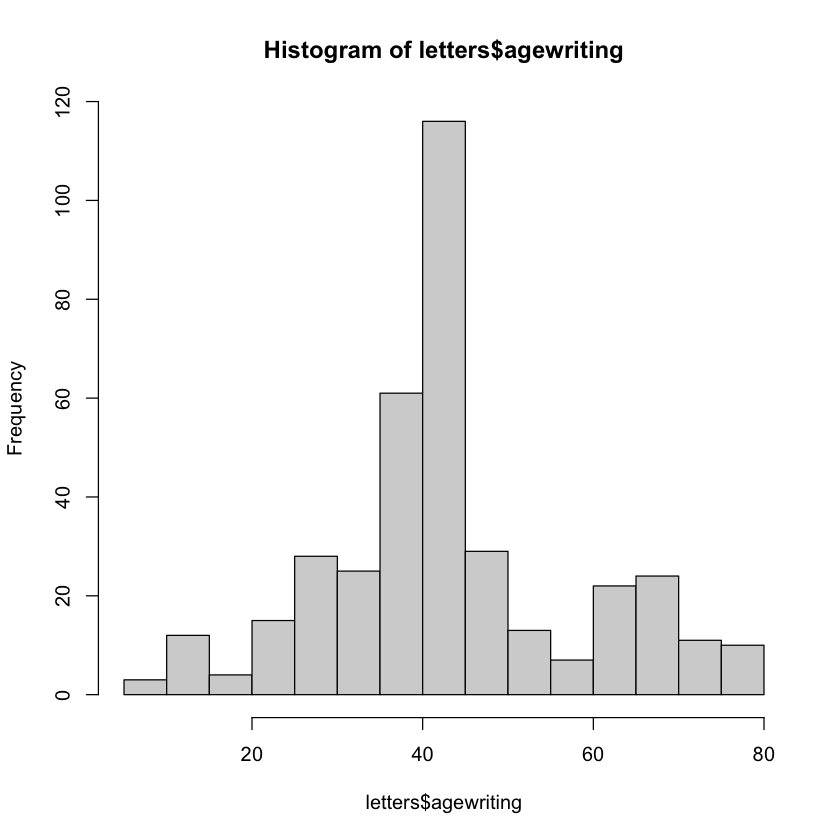

In [158]:
#What is the breakdown for age writing

hist(letters$agewriting) 
sum(is.na(letters$agewriting))

[1] 3

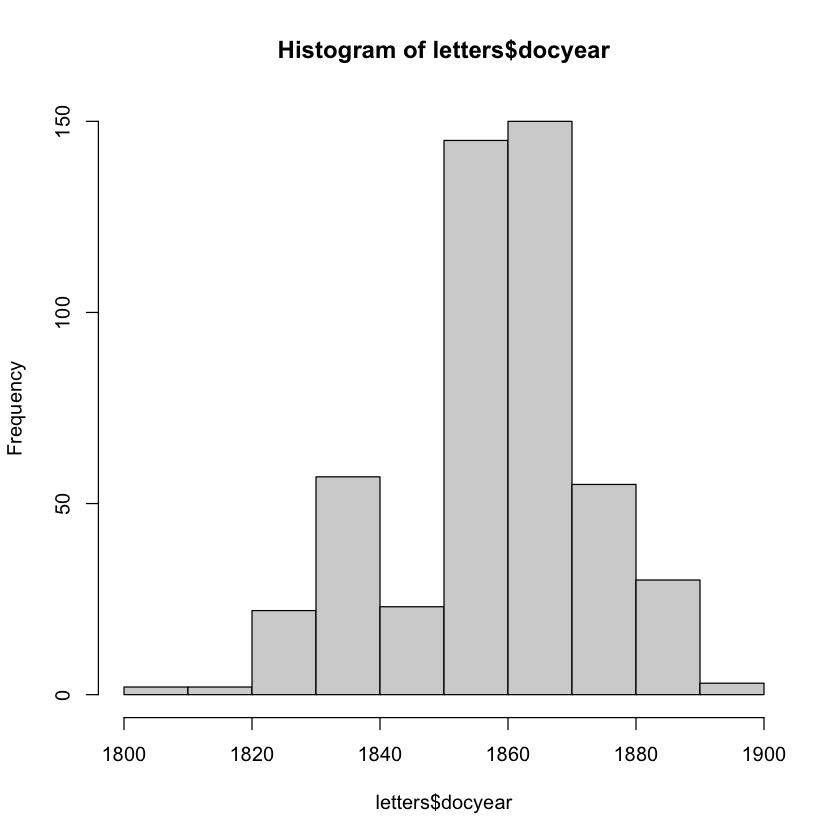

In [159]:
#What is the breakdown for year of writing

hist(letters$docyear)
sum(is.na(letters$docyear))

[1] 15

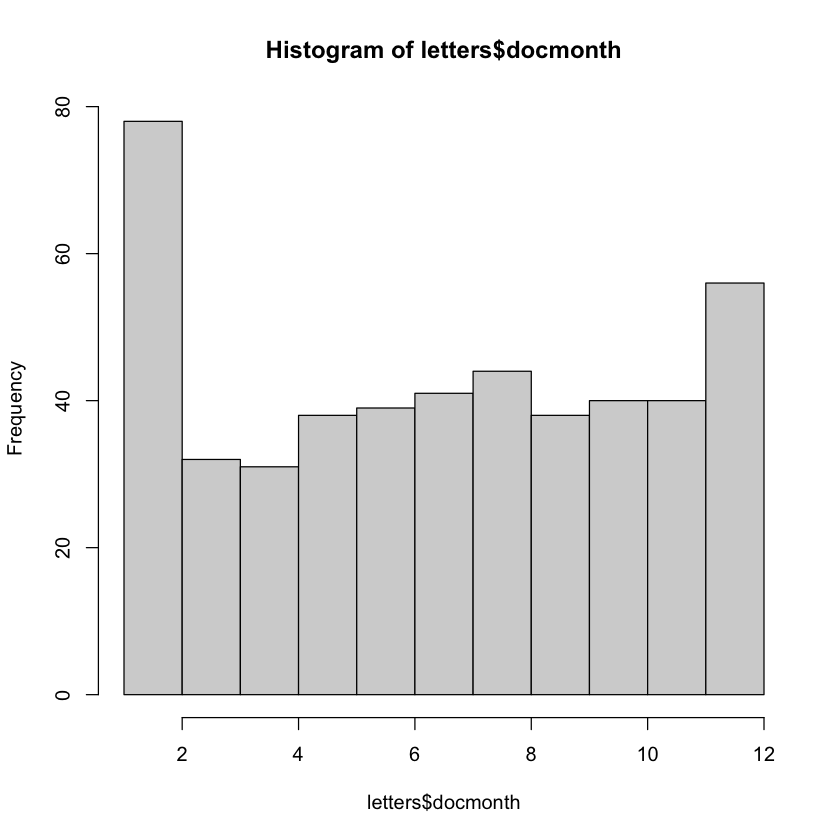

In [160]:
#What is the breakdown for month of writing

hist(letters$docmonth)
sum(is.na(letters$docmonth))

In [161]:
#What is the breakdown for national origin by doc and by author for letters

letters$nationalOrigin <- droplevels(letters$nationalOrigin)

lettersG <- letters %>% #Create new variable for the collection of letters
reframe(nationalOrigin) #summarized by relMin
table(lettersG$nationalOrigin) #plot collection religious minority breakdown
prop.table(as.matrix(table(lettersG$nationalOrigin)), 2)*100

letterAuthorsG <- letters %>% #Create new variable for the writer pool
reframe(nationalOrigin, group_by=docauthorid) %>% #summarized by relMin and grouped by author
unique() #unique values only
table(letterAuthorsG$nationalOrigin) #plot religious minority breakdown
prop.table(as.matrix(table(letterAuthorsG$nationalOrigin)), 2)*100 #NAs excluded

# How many authors are NA for nationalOrigin?
letters %>% 
filter(is.na(nationalOrigin)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


 English European    Irish  Italian Scottish    Welsh 
     327        1       44       51       42       26 

English,66.598778
European,0.203666
Irish,8.961303
Italian,10.386965
Scottish,8.553971
Welsh,5.295316



 English European    Irish  Italian Scottish    Welsh 
      35        1       10        1       26       21 

English,37.23404
European,1.06383
Irish,10.63830
Italian,1.06383
Scottish,27.65957
Welsh,22.34043


[1] 1

I am going to keep nationalOrigin because the amount of missing data is low, but may not use for modeling, or if I do, will recode it into a binary variable. For example, invisible or not, according to Erickson (1972).

In [162]:
#What is the breakdown for religious minority by doc and by author for letters

lettersG <- letters %>% #Create new variable for the collection of letters
reframe(relMin) #summarized by relMin
table(lettersG$relMin) #plot collection religious minority breakdown
prop.table(as.matrix(table(lettersG$relMin)), 2)*100

# How many letters are NA for relMin?
sum(is.na(letters$relMin))

letterAuthorsG <- letters %>% #Create new variable for the writer pool
reframe(relMin, group_by=docauthorid) %>% #summarized by relMin and grouped by author
unique() #unique values only
table(letterAuthorsG$relMin) #plot religious minority breakdown
prop.table(as.matrix(table(letterAuthorsG$relMin)), 2)*100 #NAs excluded

# How many authors are NA for relMin?
letters %>% 
filter(is.na(relMin)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


FALSE  TRUE 
  337    59 

FALSE,85.10101
TRUE,14.89899


[1] 96


FALSE  TRUE 
   20     7 

FALSE,74.07407
TRUE,25.92593


[1] 68

In [163]:
#What is the breakdown for skilled labourers by doc and by author for letters

lettersG <- letters %>% #Create new variable for the collection of letters
reframe(S) #summarized by S
table(lettersG$S) #plot 
prop.table(as.matrix(table(lettersG$S)), 2)*100

letterAuthorsG <- letters %>% #Create new variable for the writer pool
reframe(S, group_by=docauthorid) %>% #summarized by gender and grouped by L
unique() #unique values only
table(letterAuthorsG$S) #plot
prop.table(as.matrix(table(letterAuthorsG$S)), 2)*100

# How many authors are NA for L?
letters %>% 
filter(is.na(S)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


FALSE  TRUE 
  402    40 

FALSE,90.950226
TRUE,9.049774



FALSE  TRUE 
   39    13 

FALSE,75
TRUE,25


[1] 43

In [164]:
#What is the breakdown for unskilled labourers by doc and by author for letters

lettersG <- letters %>% #Create new variable for the collection of letters
reframe(L) #summarized by L
table(lettersG$L) #plot 
prop.table(as.matrix(table(lettersG$L)), 2)*100

letterAuthorsG <- letters %>% #Create new variable for the writer pool
reframe(L, group_by=docauthorid) %>% #summarized by gender and grouped by L
unique() #unique values only
table(letterAuthorsG$L) #plot
prop.table(as.matrix(table(letterAuthorsG$L)), 2)*100

# How many authors are NA for L?
letters %>% 
filter(is.na(L)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


FALSE  TRUE 
  421    21 

FALSE,95.248869
TRUE,4.751131



FALSE  TRUE 
   45     7 

FALSE,86.53846
TRUE,13.46154


[1] 43

Note that the L and UWL variables have the same number of letters and authors. Using the L variable because it is more theoretically robust. I am going to drop the Erickson and Getz variables for now and just keep the Ing set, including all levels. 

In [165]:
# What are the stats for age at death?

letters$agedeath <- letters$deathyear - letters$birthyear
summary(letters$agedeath)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  36.00   79.00   79.00   80.26   82.00   93.00     127 

In [166]:
lettersG <- letters %>% #Create new variable for the collection of letters
reframe(agedeath) #summarized by L
table(lettersG$agedeath) #plot 


 36  47  57  61  70  71  72  73  78  79  81  82  86  91  93 
  6   2   1   4   6  12   1   1   1 170   2  92  11  51   5 

In [170]:
letterAuthorsG <- letters %>% #Create new variable for the writer pool
reframe(agedeath, group_by=docauthorid) %>% #summarized by gender and grouped by L
unique() #unique values only
table(letterAuthorsG$agedeath) #plot


36 47 57 61 70 71 72 73 78 79 81 82 86 91 93 
 1  1  1  2  1  1  1  1  1  1  1  2  1  1  1 

In [171]:
# How many authors are NA for ageDeath?
letters %>% 
filter(is.na(agedeath)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()

[1] 78

Even though there is a high level of missingness for the age at death variable, I am going to keep it. Maybe will come in useful later. Otherwise, dropping un-used variables.

In [172]:
vars  <- c('docauthorid',
           'docauthorname',
           'docid',
           'docyear',
           'docmonth',
           'authorgender',
           'agewriting',
           'agedeath',
           'relMin',
           'nationalOrigin',
           'authorLocation',
           'U',
           'M',
           'S',
           'F',
           'L'
          )

letters <- letters[vars]

In [176]:
dim(letters)

[1] 492  16

In [174]:
summary(letters)

     docauthorid                                 docauthorname        docid    
 per0038009:170   Harris, Sarah Stretch, 1818-1897      :170   S1019-D002:  1  
 per0004772: 88   Moodie, Susannah Strickland, 1803-1885: 88   S1019-D004:  1  
 per0001043: 51   Segale, Sister Blandina, 1850-1941    : 51   S1019-D005:  1  
 per0027000: 12   Robb, Alexander, 1839-                : 12   S1019-D006:  1  
 per0038008: 11   Harris, Critchlow, 1813-1899          : 11   S1019-D007:  1  
 per0026981: 10   Carrothers, Joseph, 1793(?)-          : 10   S1019-D008:  1  
 (Other)   :150   (Other)                               :150   (Other)   :486  
    docyear        docmonth      authorgender   agewriting       agedeath    
 Min.   :1804   Min.   : 1.000   F:333        Min.   : 9.00   Min.   :36.00  
 1st Qu.:1854   1st Qu.: 4.000   M:159        1st Qu.:38.00   1st Qu.:79.00  
 Median :1860   Median : 7.000                Median :42.00   Median :79.00  
 Mean   :1858   Mean   : 6.811                Me

In [175]:
write.csv(letters, 
          "20240405_PhD_NaildohSubset.csv", 
          row.names=FALSE)

## References

Conway, A. (1961). The Welsh in America: Letters from the immigrants. University of Minnesota Press. https://www.jstor.org/stable/10.5749/j.cttts8t0.

Turnbull, T. (1914). T. Turnbull’s travels from the United States across the plains to California (F. L. (Frederic L. Paxson & R. G. Thwaites, Eds.). Madison, Published for the State Historical Society of Wisconsin. http://archive.org/details/tturnbullstravel00turnrich
